# 단순선형회귀

> 속도에 따른 제동거리 예측 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from ipywidgets import interact

### [2] 데이터셋 준비하기

In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/cars.xlsx', info=False)


상위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+


## #02. 데이터 전처리

### [1] 훈련/검증 데이터 분리

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size = 0.3)
rows, cols = x_train.shape
rows, cols

(35, 1)

## #03. 훈련 모델 적합

### [1] 신경망 정의

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 회귀 | 단순선형회귀 | relu, linear | adam | mse | mae | |

In [4]:
model = Sequential()

# 최종 검증 손실률: 374.854431, 최종 검증 절대오차: 15.983886
# model.add(Dense(2, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 376.018341, 최종 검증 절대오차: 15.594769
model.add(Dense(4, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 377.073425, 최종 검증 절대오차: 16.292393
# model.add(Dense(8, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 380.726410, 최종 검증 절대오차: 16.663055
# model.add(Dense(16, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 386.750305, 최종 검증 절대오차: 17.112757
# model.add(Dense(32, activation = 'relu', input_shape = (cols, )))

# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

# 손실함수는 mse, 최적화 함수는 adam --> 문자열로 지정하는 것도 가능함
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 학습하기

In [5]:
%%time
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 309.2338 - mae: 11.9329
최종 훈련 손실률: 314.353973, 최종 훈련 절대오차: 12.033688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 408.9046 - mae: 14.6443
최종 검증 손실률: 408.904633, 최종 검증 절대오차: 14.644342
CPU times: total: 39.7 s
Wall time: 43.3 s


,loss,mae,val_loss,val_mae
epochs,,,,
1,3074.955811,47.977409,2612.102051,45.270443
2,3067.958008,47.913963,2606.301514,45.210983
3,3060.718262,47.851933,2600.604736,45.152512
4,3054.050049,47.792202,2594.771240,45.092556
5,3047.191895,47.730774,2588.933350,45.032482
...,...,...,...,...
496,321.523407,12.186476,412.173157,14.635771
497,319.992035,12.151555,411.315247,14.637982
498,318.572815,12.123592,410.497528,14.640116


### [3] 훈련 결과 시각화

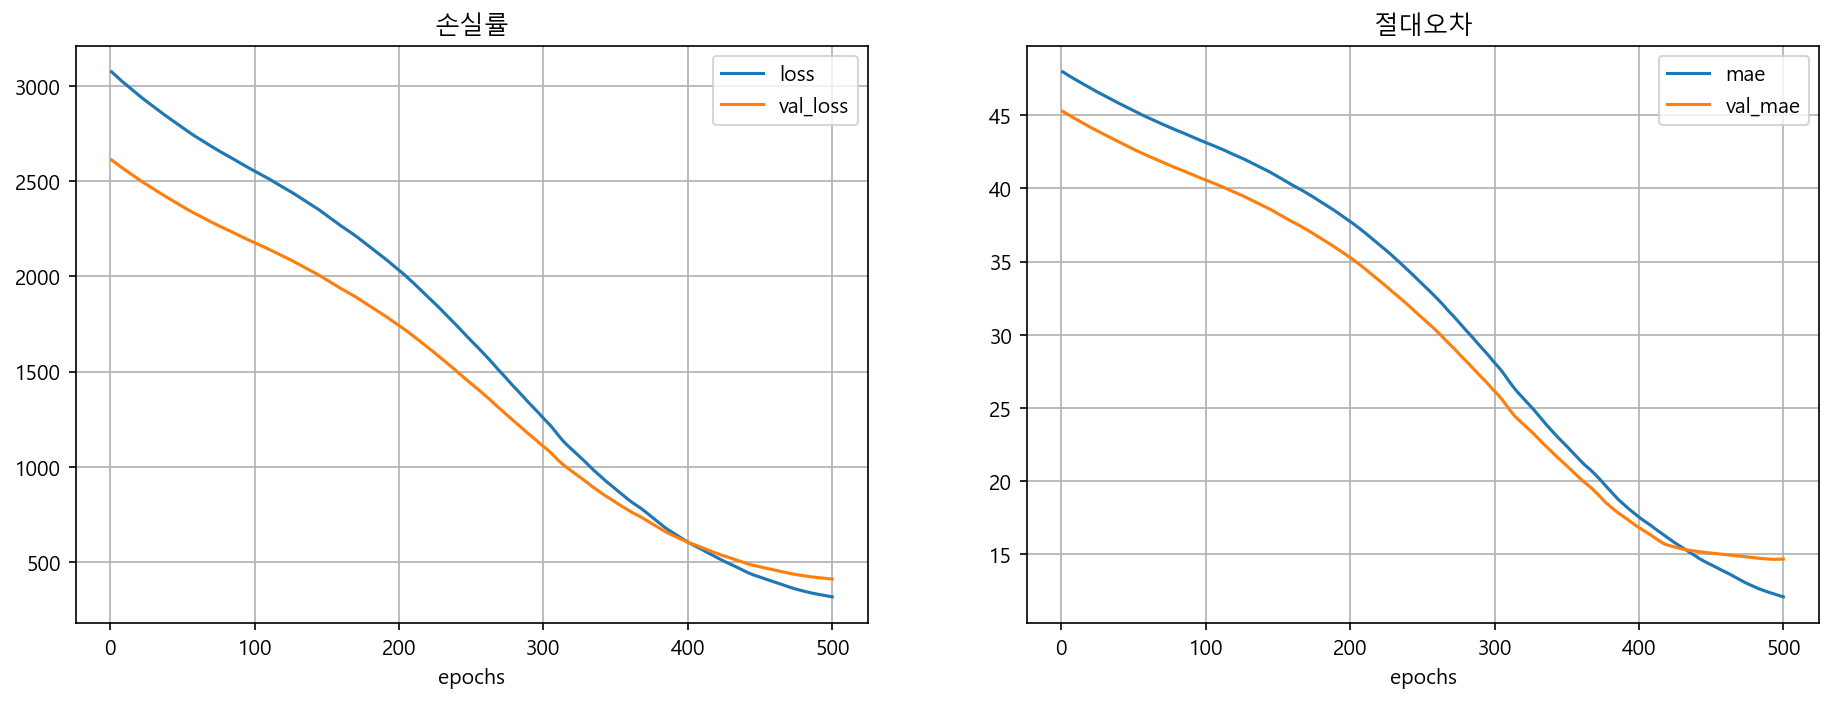

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()

## #04. 예측 결과 활용

### [1] 예측치 구하기

In [7]:
pred =  model.predict(x_test, verbose=0)
pred

array([[40.3192  ],
       [28.992165],
       [26.72676 ],
       [47.115414],
       [17.665138],
       [38.053787],
       [47.115414],
       [42.584602],
       [33.52298 ],
       [19.930542],
       [42.584602],
       [44.85001 ],
       [38.053787],
       [42.584602],
       [31.257572]], dtype=float32)

### [2] 결과 데이터 셋 구성

In [8]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : pred.flatten()
})

kdf['오차'] = kdf['실제값']-kdf['예측값']

my_pretty_table(kdf)

+----+--------------+----------+----------+-----------+
|    |   검증데이터 |   실제값 |   예측값 |      오차 |
|----+--------------+----------+----------+-----------|
| 28 |           17 |       32 |  40.3192 |   -8.3192 |
| 11 |           12 |       14 |  28.9922 |  -14.9922 |
| 10 |           11 |       28 |  26.7268 |   1.27324 |
| 41 |           20 |       56 |  47.1154 |   8.88459 |
|  2 |            7 |        4 |  17.6651 |  -13.6651 |
| 27 |           16 |       40 |  38.0538 |   1.94621 |
| 38 |           20 |       32 |  47.1154 |  -15.1154 |
| 31 |           18 |       42 |  42.5846 | -0.584602 |
| 22 |           14 |       80 |   33.523 |    46.477 |
|  4 |            8 |       16 |  19.9305 |  -3.93054 |
| 33 |           18 |       76 |  42.5846 |   33.4154 |
| 35 |           19 |       36 |    44.85 |  -8.85001 |
| 26 |           16 |       32 |  38.0538 |  -6.05379 |
| 34 |           18 |       84 |  42.5846 |   41.4154 |
| 18 |           13 |       46 |  31.2576 |   14.7424 |
+----

### [3] 관측치와 예측치 비교 시각화

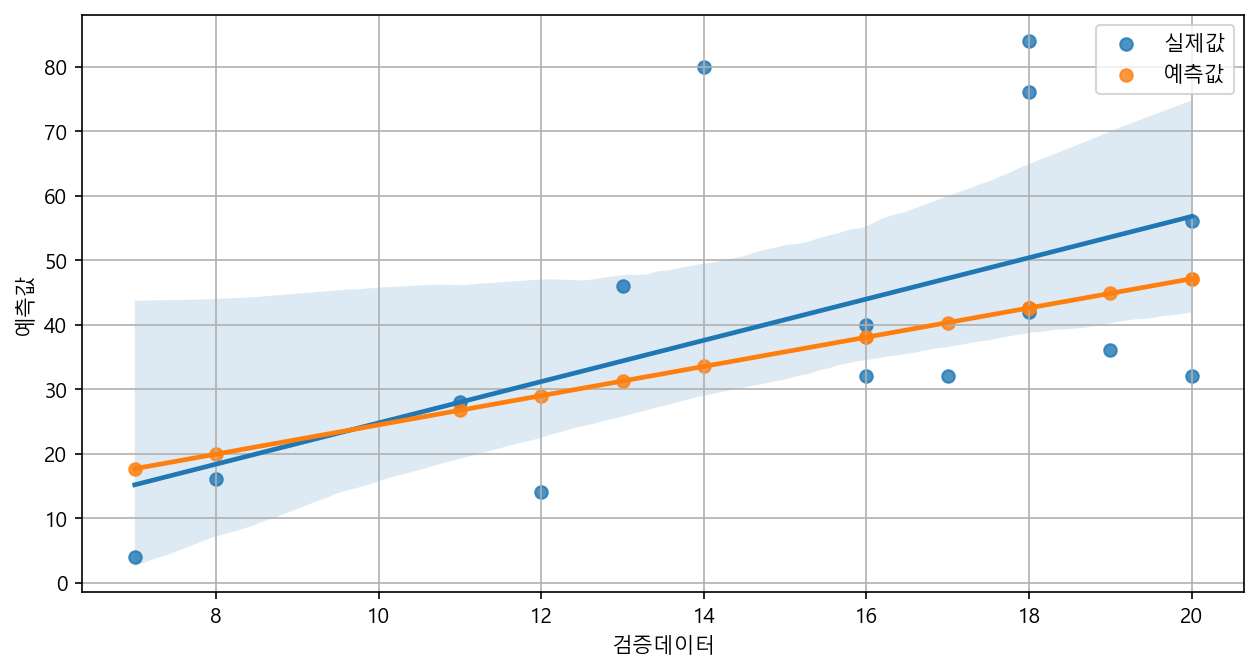

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.gca()

sb.regplot(data=kdf, x='검증데이터', y='실제값', label='실제값', ax=ax)
sb.regplot(data=kdf, x='검증데이터', y='예측값', label='예측값', ax=ax)
ax.legend()
ax.grid()
plt.show()
plt.close()



### [3] 임의의 값에 대한 머신러닝 예측 결과

#### (1) 단일 값을 통한 예측

In [10]:
my_speed = 50
my_speed_arr = np.array([[my_speed]])
my_dist = model.predict(my_speed_arr, verbose=0)
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, my_dist))

속도가 50인 자동차의 제동거리는 115로 예상됩니다.


### [4] 사용자 인터페이스 적용

In [11]:
@interact(x= (0, 100, 1))
def test(x):
    #print(x)
    input_x = np.array([[x]])
    output_y = model.predict(input_x, verbose=0)
    print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (x, output_y))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [16]:
@interact(my_choose= ['train','test'])
def show_data(my_choose):
    yname = '실제값' if my_choose == 'test' else '예측값'
    
    fig = plt.figure(figsize=(10, 5), dpi = 100)
    ax = fig.gca()
    sb.regplot(data=kdf, x='검증데이터', y=yname, ax=ax)
    ax.grid()
    plt.show()
    plt.close()

interactive(children=(Dropdown(description='my_choose', options=('train', 'test'), value='train'), Output()), …